<a href="https://colab.research.google.com/github/rohan-gopalam/5_digit_number_recognizer/blob/main/Multiple_Number_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import tensorflow as tf
import random
from os import listdir
import glob
import numpy as np
from scipy import misc
import h5py

from keras.utils import np_utils
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


def build_synth_data(data,labels,dataset_size):


    #dimesions of five 28x28 digit images
    synth_img_height = 28
    synth_img_width = 140
    
    #creating new dataset
    synth_data = np.ndarray(shape=(dataset_size,synth_img_height,synth_img_width))
    
    synth_labels = [] 
    
    #creating a string of 5 images
    for i in range(0,dataset_size):
        
        num_digits = 5
        
        #getting a random index from the data
        synth_indices = [random.randint(0,len(data)-1) for p in range(0,num_digits)]
        
        #using the indices above to chain together a string of 5 digit images from the data
        new_image = np.hstack([data[index] for index in synth_indices])
        
        #using the indices above to create the new labels
        new_label =  [labels[index] for index in synth_indices]
            
        
       #adding the new image/label to the dataset that will be returned
        synth_data[i,:,:] = new_image
        synth_labels.append(tuple(new_label))
        
    return synth_data,synth_labels


possible_classes = 10

#this will split the full label set into 5 different label sets for each digit and 
#to_categorical them to do catergorical cross-entropy
def convert_labels(labels):
    
    dig0_arr = np.ndarray(shape=(len(labels),possible_classes))
    dig1_arr = np.ndarray(shape=(len(labels),possible_classes))
    dig2_arr = np.ndarray(shape=(len(labels),possible_classes))
    dig3_arr = np.ndarray(shape=(len(labels),possible_classes)) 
    dig4_arr = np.ndarray(shape=(len(labels),possible_classes))
    
    for index,label in enumerate(labels):
        dig0_arr[index,:] = np_utils.to_categorical(label[0],possible_classes)
        dig1_arr[index,:] = np_utils.to_categorical(label[1],possible_classes)
        dig2_arr[index,:] = np_utils.to_categorical(label[2],possible_classes)
        dig3_arr[index,:] = np_utils.to_categorical(label[3],possible_classes)
        dig4_arr[index,:] = np_utils.to_categorical(label[4],possible_classes)
        
    return [dig0_arr,dig1_arr,dig2_arr,dig3_arr,dig4_arr]

def prep_data_keras(img_data):
    
    
    img_data = img_data.reshape(len(img_data),28,140,1)
    
    
    img_data = img_data.astype('float32')
    
    
    img_data /= 255
    
    return img_data


 
random.seed(101)


mnist_image_height = 28
mnist_image_width = 28


from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_synth_train,y_synth_train = build_synth_data(X_train,y_train,60000)


X_synth_test,y_synth_test = build_synth_data(X_test,y_test,10000)

train_labels = convert_labels(y_synth_train)
test_labels = convert_labels(y_synth_test)

train_images = prep_data_keras(X_synth_train)
test_images = prep_data_keras(X_synth_test)


inputs = tf.keras.Input(shape=(28,140,1))


mod = tf.keras.layers.Conv2D(32, (3,5), (3), padding="same")(inputs)
mod = tf.keras.layers.Activation("relu")(mod)


#mod = tf.keras.layers.BatchNormalization(axis=-1)(mod)

mod = tf.keras.layers.Conv2D(32, (3,3), 3)(mod)
mod = tf.keras.layers.Activation("relu")(mod)


#mod = tf.keras.layers.BatchNormalization(axis=-1)(mod)

mod = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(mod)

mod = tf.keras.layers.Dropout(0.25)(mod)

mod1 = tf.keras.layers.Flatten()(mod)

mod2 = tf.keras.layers.Dense(128, activation='relu')(mod1)

mod2 = tf.keras.layers.Dropout(0.5)(mod2)

c0 = tf.keras.layers.Dense(10, activation='softmax', name = 'c0')(mod2)
c1 = tf.keras.layers.Dense(10, activation='softmax', name = 'c1')(mod2)
c2 = tf.keras.layers.Dense(10, activation='softmax', name = 'c2')(mod2)
c3 = tf.keras.layers.Dense(10, activation='softmax', name = 'c3')(mod2)
c4 = tf.keras.layers.Dense(10, activation='softmax', name = 'c4')(mod2)


model = tf.keras.models.Model(inputs = inputs,outputs =[c0,c1,c2,c3,c4])
model.compile(loss='categorical_crossentropy',
              optimizer = "adam",
              metrics=['accuracy'])

batch_size = 128
epochs = 5
model.fit(train_images, 
          train_labels, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (test_images, test_labels),
          verbose = 1)

score = model.evaluate(test_images, test_labels, verbose=0)
print(score)
print(model.metrics_names)

print("c0 loss:" + str(score[0]))
print("c1 loss:" + str(score[1]))
print("c2 loss:" + str(score[2]))
print("c3 loss:" + str(score[3]))
print("c4 loss:" + str(score[4]))
print("c0 acc:" + str(score[5]))
print("c1 acc:" + str(score[6]))
print("c2 acc:" + str(score[7]))
print("c3 acc:" + str(score[8]))
print("c4 acc:" + str(score[9]))


model.save("test_model.h5")



Epoch 1/5
469/469 [==============================] - 26s 53ms/step - loss: 8.5000 - c0_loss: 1.6458 - c1_loss: 1.6992 - c2_loss: 1.5543 - c3_loss: 1.7542 - c4_loss: 1.8465 - c0_accuracy: 0.4176 - c1_accuracy: 0.3914 - c2_accuracy: 0.4568 - c3_accuracy: 0.3702 - c4_accuracy: 0.3420 - val_loss: 4.4146 - val_c0_loss: 0.8347 - val_c1_loss: 0.8886 - val_c2_loss: 0.6597 - val_c3_loss: 0.9246 - val_c4_loss: 1.1070 - val_c0_accuracy: 0.7969 - val_c1_accuracy: 0.7702 - val_c2_accuracy: 0.8405 - val_c3_accuracy: 0.7653 - val_c4_accuracy: 0.6473
Epoch 2/5
469/469 [==============================] - 25s 52ms/step - loss: 5.9622 - c0_loss: 1.1449 - c1_loss: 1.1781 - c2_loss: 0.9963 - c3_loss: 1.2221 - c4_loss: 1.4209 - c0_accuracy: 0.6092 - c1_accuracy: 0.5900 - c2_accuracy: 0.6617 - c3_accuracy: 0.5742 - c4_accuracy: 0.4961 - val_loss: 3.3096 - val_c0_loss: 0.5994 - val_c1_loss: 0.6361 - val_c2_loss: 0.4782 - val_c3_loss: 0.6663 - val_c4_loss: 0.9297 - val_c0_accuracy: 0.8593 - val_c1_accuracy: 0.8

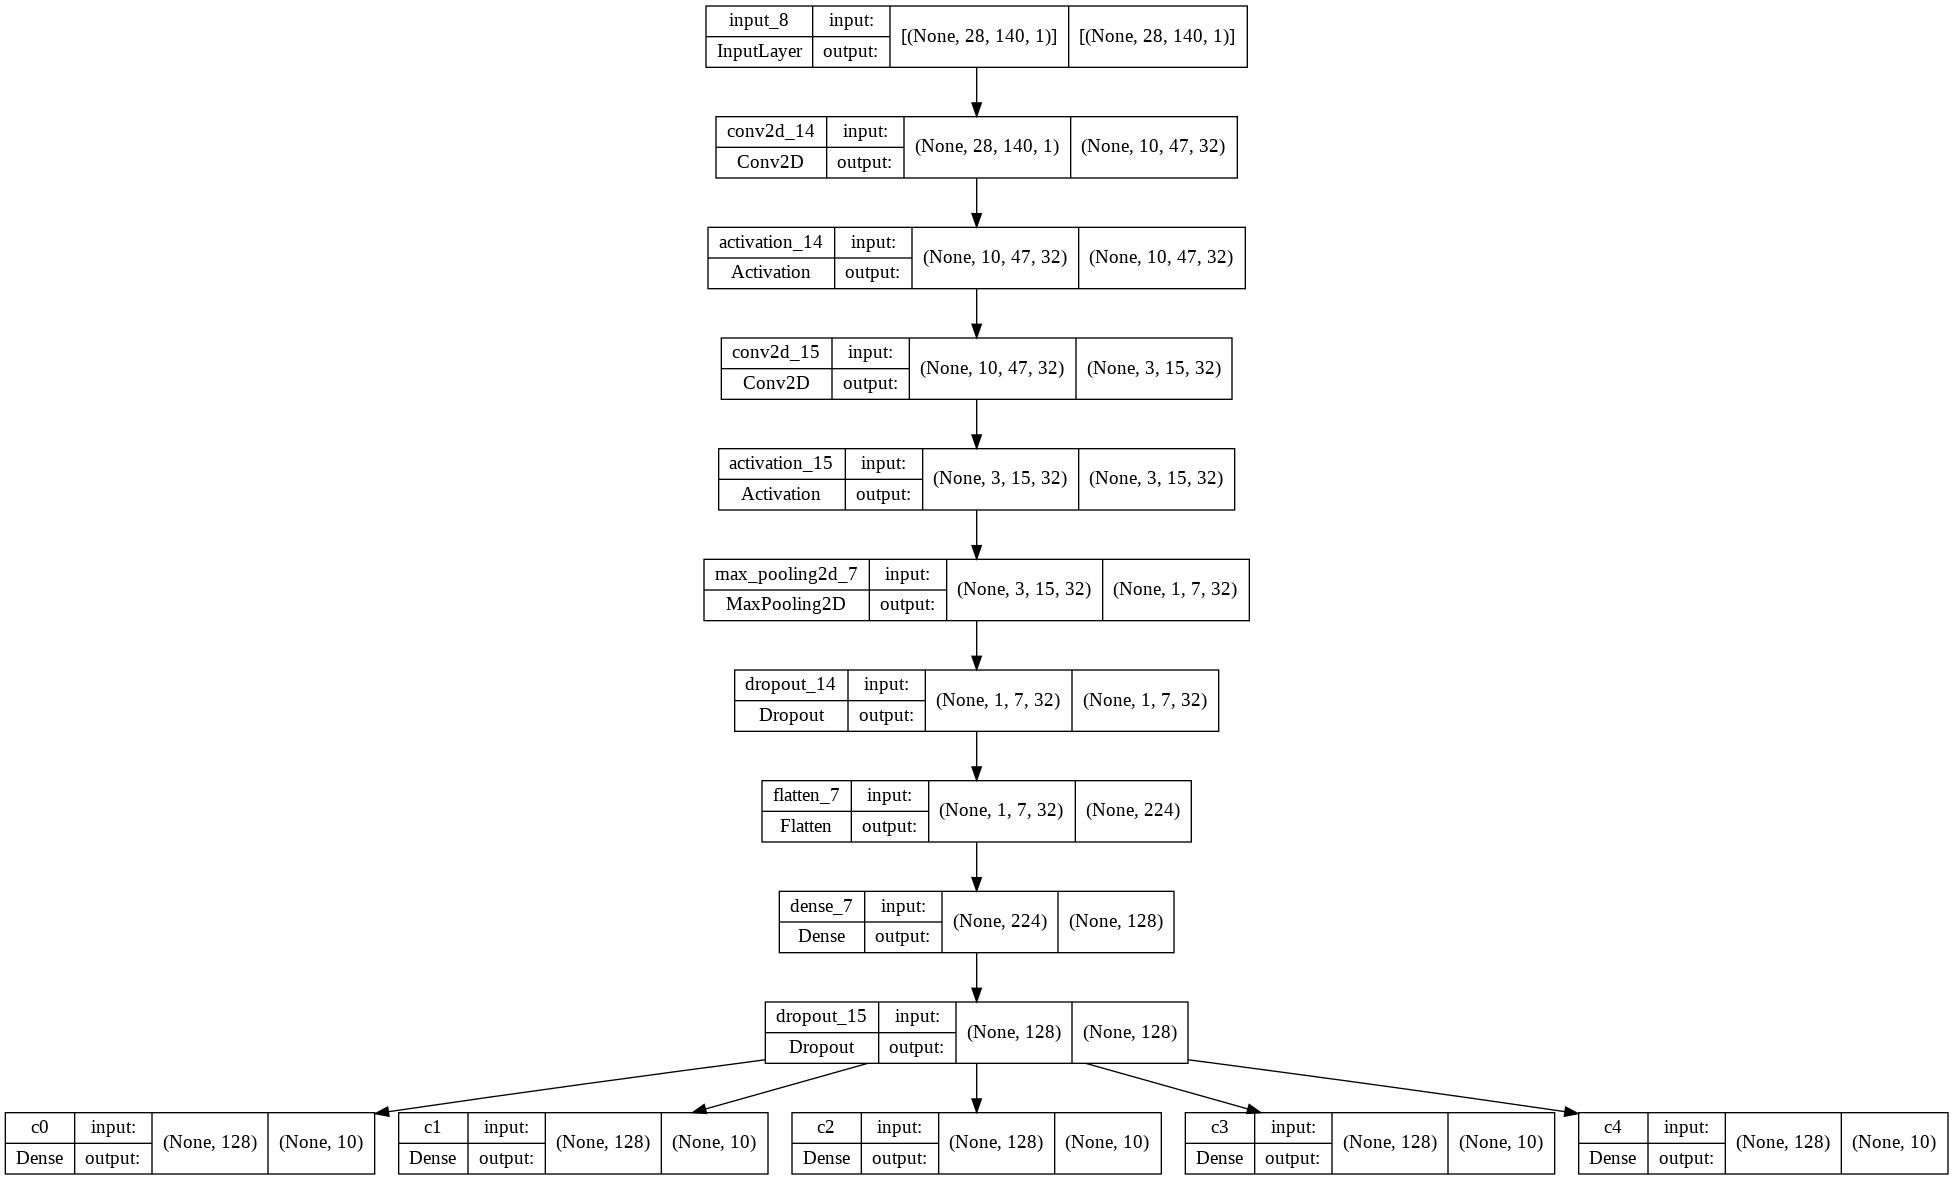

In [ ]:
import tensorflow as tf
from keras.models import load_model
tf.keras.utils.plot_model(model, show_shapes=True)



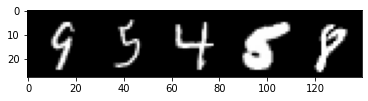

Correct Answer:  (9, 5, 4, 5, 8)
Computer's guess:  9 6 4 5 8


In [88]:
#Randomly test and show a specific case from train set


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

images = train_images
label = y_synth_train
location = random.randint(0,len(images)-1)
img = images[location]
im = np.squeeze(img)
plt.imshow(im, cmap = 'gray')
plt.show()

model = load_model('test_model.h5')
img = img.reshape(1, 28, 140, 1)
digit = model.predict(img)
digit1 = digit[0].argmax()
digit2 = digit[1].argmax()
digit3 = digit[2].argmax()
digit4 = digit[3].argmax()
digit5 = digit[4].argmax()
print("Correct Answer: ", label[location])
print("Computer's guess: ", digit1, digit2, digit3, digit4, digit5)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


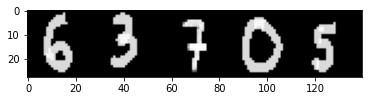

Correct Answer:  6 3 7 0 5
Computer's guess:  6 5 3 0 9


In [92]:
#Can insert 5 different numbers that you drew to make a string
#The model struggles a lot when you upload digits you drew because I think it doesnt size correctly

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

answer = [6,3,7,0,5]
num1 = load_img("6.png", grayscale=True, target_size=(28, 28))
num2 = load_img("3.png", grayscale=True, target_size=(28, 28))
num3 = load_img("7.png", grayscale=True, target_size=(28, 28))
num4 = load_img("0.png", grayscale=True, target_size=(28, 28))
num5 = load_img("5.png", grayscale=True, target_size=(28, 28))

im = np.hstack((num1, num2, num3, num4, num5))
plt.imshow(im, cmap = plt.get_cmap('Greys'))
plt.show()

im = img_to_array(im)
im = im.reshape(1, 28, 140, 1)
im = im / 255.0
im = 1-im


model = load_model('test_model.h5')

digit = model.predict(im)
digit1 = digit[0].argmax()
digit2 = digit[1].argmax()
digit3 = digit[2].argmax()
digit4 = digit[3].argmax()
digit5 = digit[4].argmax()
print("Correct Answer: ", answer[0], answer[1], answer[2], answer[3], answer[4])

print("Computer's guess: ", digit1, digit2, digit3, digit4, digit5)